<a href="https://github.com/d4niel9"><img src = https://user-images.githubusercontent.com/100847059/161276565-b05f0c0c-206f-44e1-940c-ce15fb7d04e3.png width = 100> </a>

<h1 align=center> <font size=5> Album "Un Verano Sin Ti" Analysis with python </font> </h1>

## Data

The data used for this project was extracted from the speech transcription site https://www.letras.com.

# Python code

### Import libraries

In [1]:
# Web scraping
import requests as rq
from bs4 import BeautifulSoup
import lxml.html as html
import os
import pathlib


# Generate the word cloud
from stop_words import get_stop_words

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator
import random


# Generate graph
import collections
from matplotlib import rcParams
import matplotlib.cm as cm

## Web Scraping

### Extract links

In [2]:
LINKS_XPATH = '//li/a[@class="bt-play-song"]/@href'
URL = 'https://www.letras.com'
ALBUM = '/bad-bunny/discografia/un-verano-sin-ti-2022/'

#https://www.letras.com/bad-bunny/discografia/un-verano-sin-ti-2022/
URL_ALMUB = URL + ALBUM

def extract_links():
    try:
        response = rq.get(URL_ALMUB)
        if response.status_code == 200:
            home = response.content.decode('utf-8')
            home_parsed = html.fromstring(home)
            links = home_parsed.xpath(LINKS_XPATH)
            print(len(links))
            return links
        else:
            raise ValueError(f'Error:{response.status_code}')
    except ValueError as ve:
           print(ve) 

# Links song´s
url_links = extract_links()
links_list = []

for link in url_links:
    link = URL + link
    links_list.append(link)

links_list

23


['https://www.letras.com/bad-bunny/moscow-mule/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/despues-de-la-playa/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/me-porto-bonito-part-chencho-corleone/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/titi-me-pregunto/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/un-ratito/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/yo-no-soy-celoso/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/tarot-part-jhay-cortez/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/neverita/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/la-corriente-part-tony-dize/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/efecto/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/party-part-rauw-alejandro/#album:un-verano-sin-ti-2022',
 'https://www.letras.com/bad-bunny/aguacero/#album:un-verano-sin-ti

### Extract lyrics

In [3]:
LYRICS_XPATH = '//div[@class="cnt-letra p402_premium"]/p/text()'

def extract_lyrics():
    lyrics = []
    for url_song in links_list:
        try:
            page = rq.get(url_song)
            if page.status_code == 200:
                home = page.content.decode('utf-8')
                home_parsed = html.fromstring(home)
                lyric = home_parsed.xpath(LYRICS_XPATH)
                lyrics.append(lyric)
            else:
                raise ValueError(f'Error:{page.status_code}')
        except ValueError as ve:
            print(ve)
            
    print(len(lyrics))
    return lyrics
            
lyrics_list = extract_lyrics()
lyrics_list

23


[['Si yo no te escribo',
  "Tú no me escribe', ey",
  'Si tú quieres, te busco',
  "Yo sé dónde tú vive'",
  "Quizá hoy está aborrecía'",
  "Pero, por dentro, tú tiene' alegría",
  'Si quieres, te la saco',
  "Dos trago' y sabes que me pongo bellaco",
  "No somo' na', pero estamo' envuelto' hace rato, oh-oh",
  'WhatsApp sin el retrato',
  'No guarda mi contacto (ey, ey, ey, ey)',
  'Pero se la saco',
  "Dos trago' y sabes que me pongo bellaco",
  "No somo' na', pero estamo' envuelto' hace rato, oh-oh",
  'WhatsApp sin el retrato',
  'No guarda mi contacto-to',
  'Todo es underwater (ey)',
  "Baby, vamo' pa'l cuarto quarter",
  "En la Uru', comiéndono' al pare'",
  "Te voy a dar duro pa' que no me compare'",
  "Ey, cuida'o con ese mahón, que se va a romper (ey)",
  'Ese booty lo va a romper (ey)',
  'Yo no sé si yo te vuelvo a ver',
  'Si mañana me voy a perder',
  "Tú ere' una player, me hiciste un crossover",
  "Esta ve' metiste, me diste game over, eh-eh (huh)",
  'Porque no puedo o

### Extract names_songs

In [4]:
def extract_names():
    names = []
    for name_song in links_list:
        try:
            page = rq.get(name_song)
            if page.status_code == 200:
                s = BeautifulSoup(page.text, 'lxml')
                name = s.find('h1')
                name = str(name)
                name_song = name.strip("<h1/>")
                name_song = name_song.replace(' ','_')
                names.append(name_song)
            else:
                raise ValueError(f'Error:{page.status_code}')
        except ValueError as ve:
            print(ve)

    print(len(names))
    return names
    
names_list = extract_names()
names_list

23


['Moscow_Mule',
 'Después_de_la_Playa',
 'Me_Porto_Bonito_(part._Chencho_Corleone)',
 'Tití_Me_Preguntó',
 'Un_Ratito',
 'Yo_No_Soy_Celoso',
 'Tarot_(part._Jhay_Cortez)',
 'Neverita',
 'La_Corriente_(part._Tony_Dize)',
 'Efecto',
 'Party_(part._Rauw_Alejandro)',
 'Aguacero',
 'Enséñame_a_Bailar',
 'Ojitos_Lindos_(part._Bomba_Estéreo)',
 'Dos_Mil_16',
 'El_Apagón',
 'Otro_Atardecer_(part._The_Marías)',
 'Un_Coco',
 'Andrea_(part._Buscabulla)',
 'Me_Fui_de_Vacaciones',
 'Un_Verano_Sin_Ti',
 'Agosto',
 'Callaita']

### Cleaning lyrics songs

In [5]:
## Cleaning lyrics songs
def song_cleaning():
    song = lyrics_list
    song = str(song)
    song = song.lower()

    song = song.replace("'",'')
    song = song.replace('"','')
    song = song.replace(',','')
    song = song.replace('[','')
    song = song.replace(']','')
    song = song.replace('(','')
    song = song.replace(')','')
    
    return song
    
song = song_cleaning()
song

'si yo no te escribo tú no me escribe ey si tú quieres te busco yo sé dónde tú vive quizá hoy está aborrecía pero por dentro tú tiene alegría si quieres te la saco dos trago y sabes que me pongo bellaco no somo na pero estamo envuelto hace rato oh-oh whatsapp sin el retrato no guarda mi contacto ey ey ey ey pero se la saco dos trago y sabes que me pongo bellaco no somo na pero estamo envuelto hace rato oh-oh whatsapp sin el retrato no guarda mi contacto-to todo es underwater ey baby vamo pal cuarto quarter en la uru comiéndono al pare te voy a dar duro pa que no me compare ey cuidao con ese mahón que se va a romper ey ese booty lo va a romper ey yo no sé si yo te vuelvo a ver si mañana me voy a perder tú ere una player me hiciste un crossover esta ve metiste me diste game over eh-eh huh porque no puedo olvidar el perreo aquel que se fue viral dime si mañana te va a quedar después de la alarma te lo voy a dar ey hoy tú no va a trabajar jeje no si quieres te la saco dos trago y sabes que

## Top 10 words

1 party
2 baby
3 mami
4 noche
5 vamo
6 cabrón
7 perreo
8 chocha
9 vida
10 mañana
11 olvidar
12 nunca
13 siempre
14 corazón
15 solo
16 ere
17 playa
18 nadie
19 aquí
20 contigo


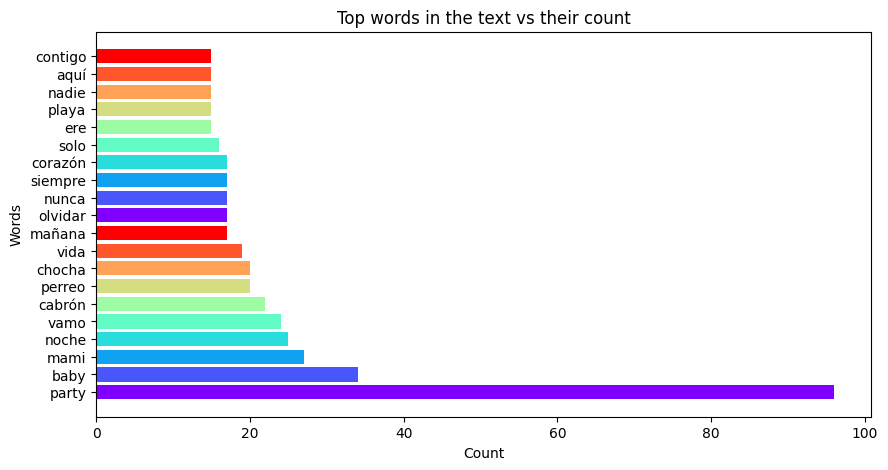

In [10]:
stop_words_en = get_stop_words('en') # English StopWords    
stop_words_es = get_stop_words('es') # Spanish StopWords
stopWords = stop_words_es + stop_words_en
stopWords += ["ve", "sol", "puerto", "rico", "ey", "si", "pa", "eh", "voy", "sé", "va", "así", "dime", "gusta", "hoy", "bien", "quiero", "quieres", "quiere", "hace"] #Adding aditional StopWords  


def top_10_words():
    filtered_words = [word for word in song.split() if word not in stopWords]
    counted_words = collections.Counter(filtered_words)

    words = []
    counts = []
    for letter, count in counted_words.most_common(20):
        words.append(letter)
        counts.append(count)

    i = 1
    for palabras in words:
        print(i, palabras)
        i+=1
    
    # Graphic list
    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 10, 5

    plt.title('Top words in the text vs their count')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)

top_10_words()

## Create WordCloud

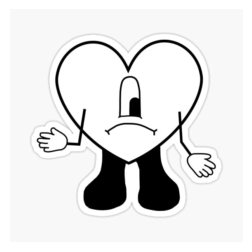

In [8]:
## Save mask to mx_mask
!wget --quiet https://ih1.redbubble.net/image.3515080960.1809/st,small,507x507-pad,600x600,f8f8f8.jpg #OutMaskImage


# Convert image to array
mask_album = np.array(Image.open('st,small,507x507-pad,600x600,f8f8f8.jpg'))


## Show imagen
fig = plt.figure() # ser size
fig.set_figwidth(3) # set width
fig.set_figheight(69) # set height

plt.imshow(mask_album, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

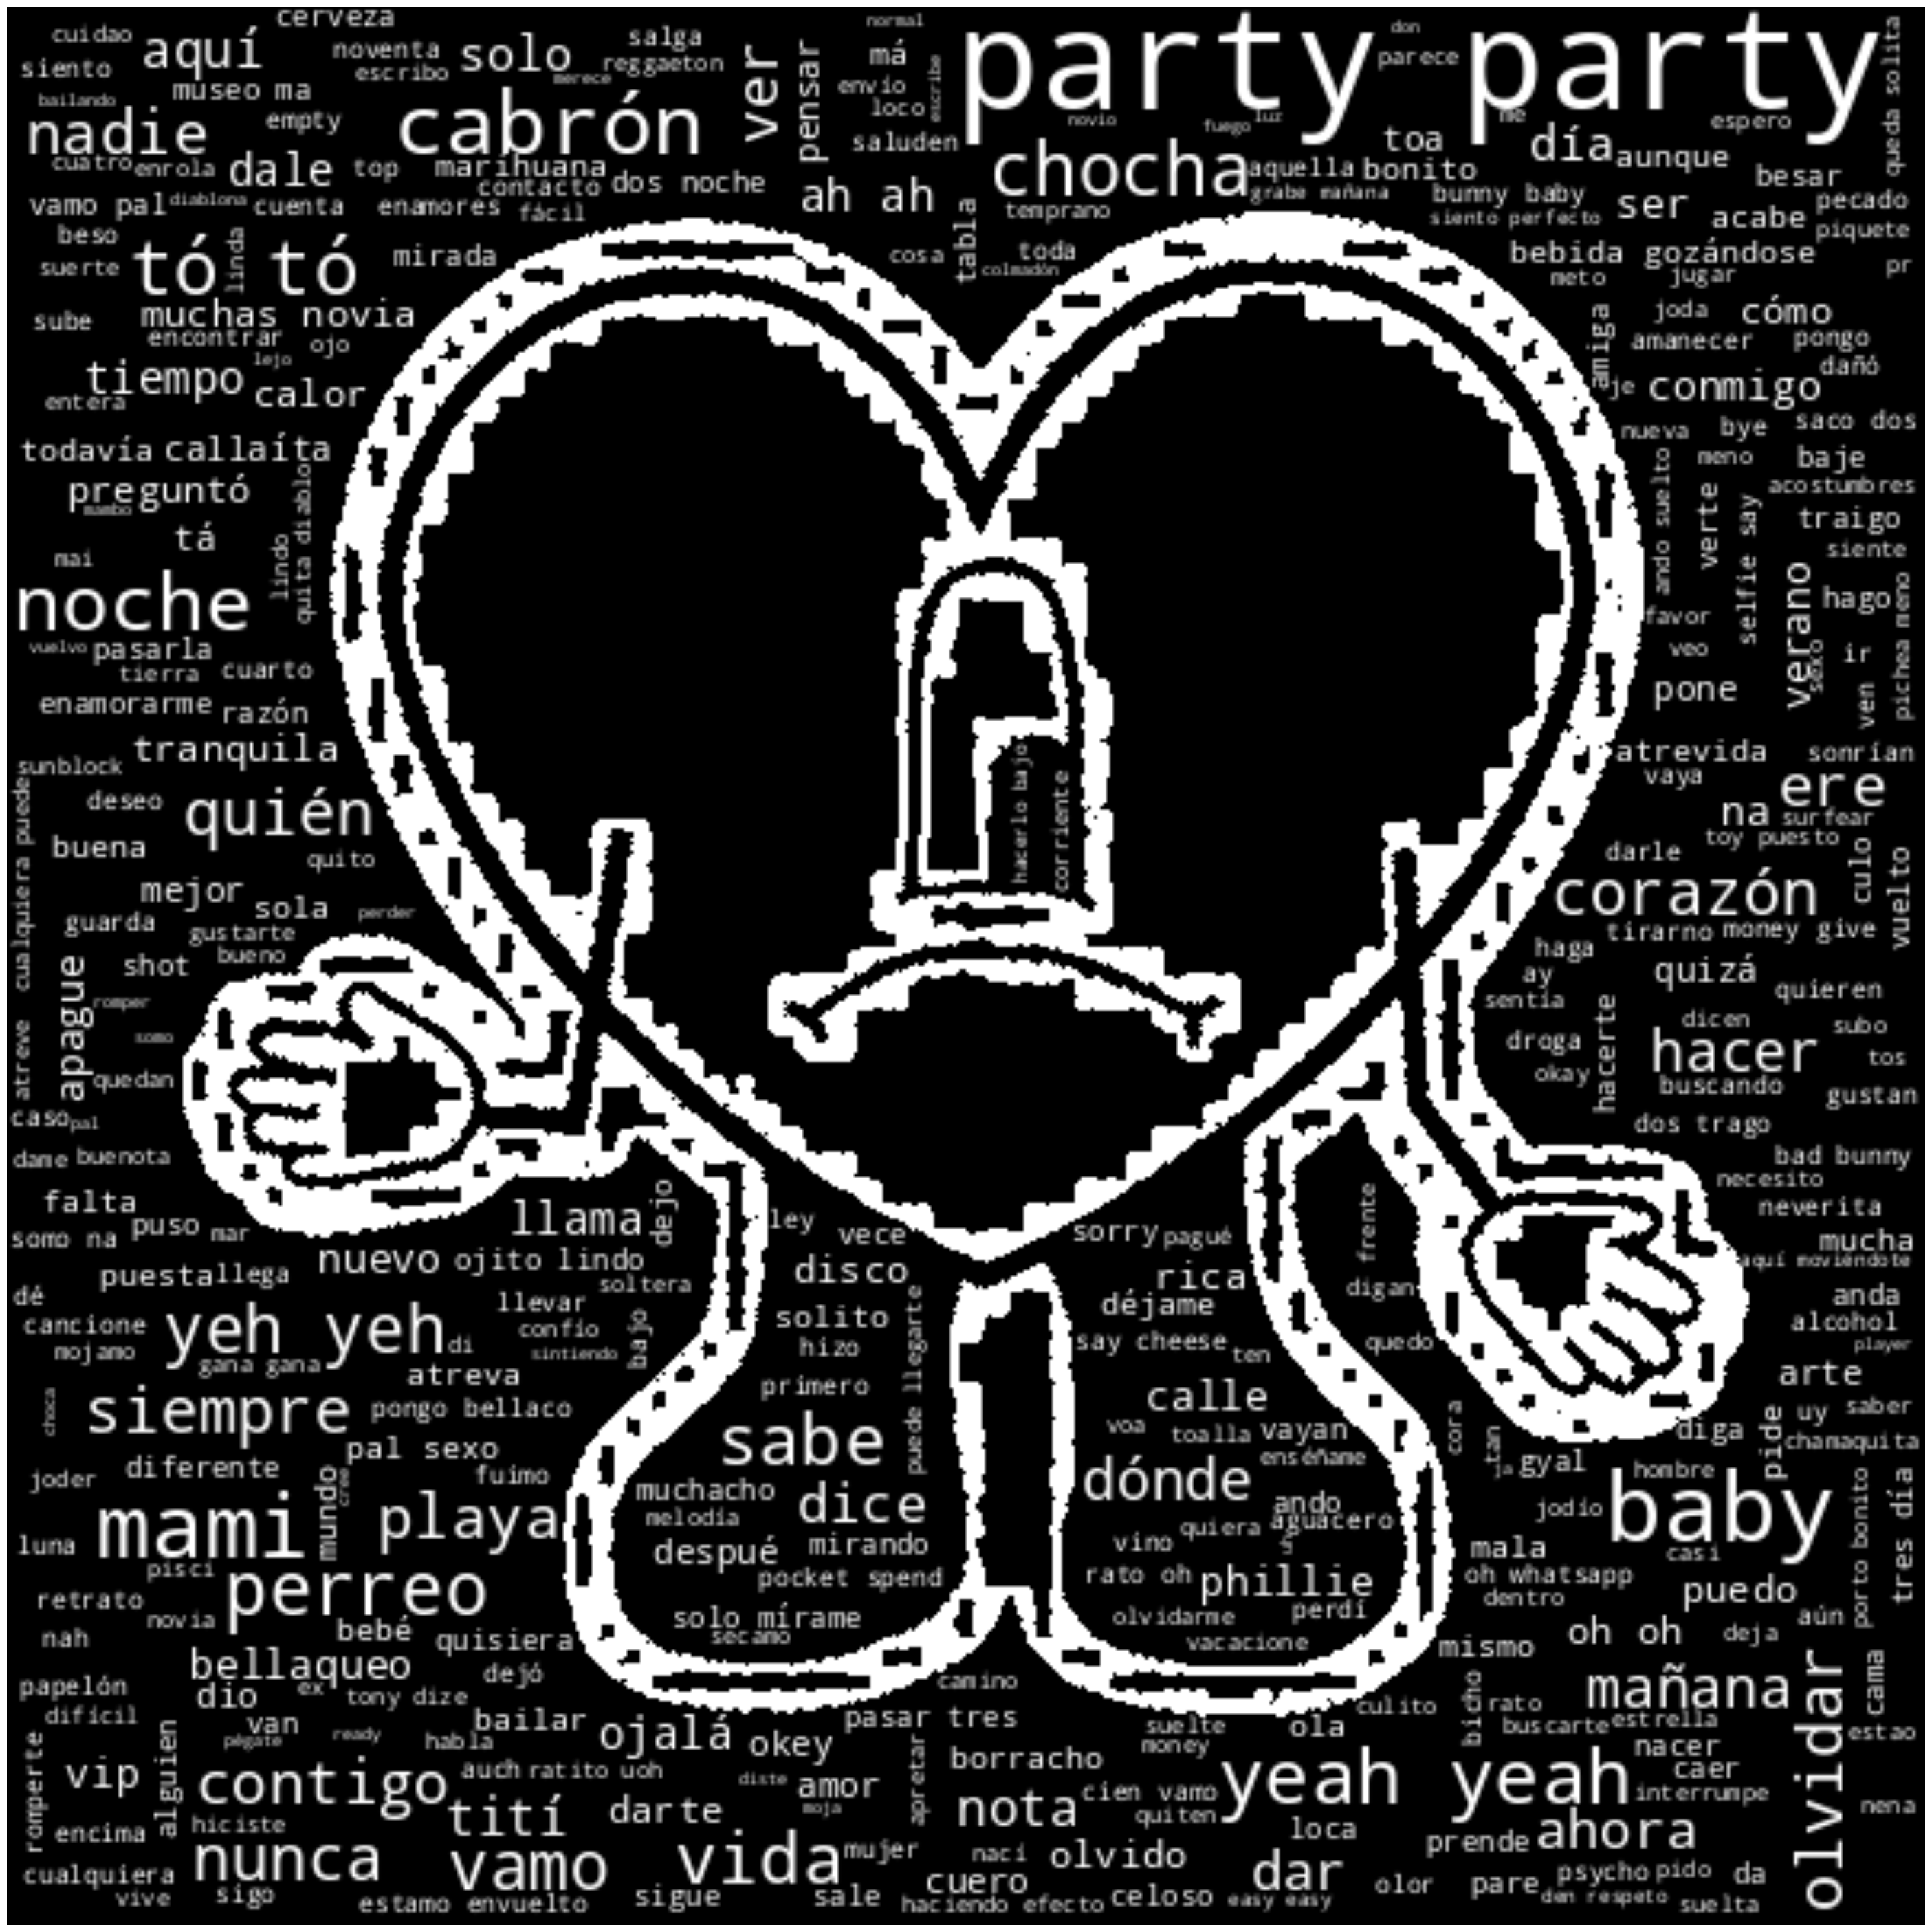

In [9]:
## WordCloud

def grey_color_func(**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(100, 1000)

# generate the word cloud
wc = WordCloud(max_words=369, mask=mask_album, stopwords=stopWords, contour_width=3, contour_color='white').generate(song)

fig = plt.figure() # set size
fig.set_figwidth(36) # set width
fig.set_figheight(69) # set height


# store default colored image
default_colors = wc.to_array()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")


# display the word cloud
plt.axis('off')
plt.show()